# Chapter 1: The Python Machine Learning Ecosystem

Topics
- The data science/machine learning workflow
- Libraries for each stage of the workflow
- Setting up ML environment

## 1. The data science/machine learning workflow

In Machine Learning, we need to work with data as a raw material. The success of a data project will largely depend on the quality of the data that we acquired as well as how the data is handled. Working with data falls into a domain of data science, so it is helpful to understand the data science workflow:

![Data Science Workflow](figs/workflow.png)

### Acquisition
Data for machine learning applications can come from any number of sources. We need to to find a way to aquire the data. We can download from data center or we may need to write a web crawler to crawl the data.

### Inspection and Exploration
Once the data has been acquired, the next step is to inspect and explore it. At this stage, the primary goal is to sanity-check the data, and the best way to accomplish this is to look for things that are either impossible or highly unlikely. The more we understand the data the better data we can prepare for our models. A good practice is to run some simple statistical tests on the data and visualize it.

### Cleanning and Preparation
When all the data is in order, the next step is to place it in a format that is amenable to modeling. This stage encompasses a number of processes such as filtering, aggregating, imputing, and transforming.

### Modeling
Once the data preparation is complete, the next phase is modeling. In this phase, an appropriate algorithm is selected and a model is trained on the data.

### Evaluation
Once the model is built and making predictions, the next step is to understand how well the model does that. This is the question that evaluation seeks to answer.

### Deployment
Once the model's performance is satisfactory, the next step is deployment. This can take a number of forms depending on the use case, but common scenarios include utilization as a feature within another larger application, a bespoke web application, or even just a simple cron job.

## 2. Python Libraries for each stage

### Acquisition
The most common ways of accession data is through RESTful APIs, Python Requests library (http://www.python-requests.org/en/latest/) is a great library to interact with APIs.

### Inspection
This is a critical step in the development of machine learning applications. Luckily, we have many awsome python libraries to get this step done.

#### Pandas

In [1]:
import os
import pandas as pd
import requests

PATH = r'../data/iris/'

In [2]:
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
with open(PATH + 'iris.data', 'w') as f:
    f.write(r.text)

In [3]:
os.listdir(PATH)

['.DS_Store', 'iris.data']

In [4]:
# Change working directory
os.chdir(PATH)

In [35]:
df = pd.read_csv('iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [6]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Using Pandas we can load data to a DataFrame. Here are some common operation we can do on a pandas DataFrame

In [7]:
df['sepal length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length, dtype: float64

We can use .ix[row, column] for data slicing

In [8]:
# Get first 3 rows of firs 2 columns
df.ix[:3,:2]

,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1


In [9]:
#Select just the width columns
df.ix[:3, [x for x in df.columns if 'width' in x]]

,sepal width,petal width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2


In [10]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df[df['class']=='Iris-virginica']

,sepal length,sepal width,petal length,petal width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


In [12]:
df.count()

sepal length    150
sepal width     150
petal length    150
petal width     150
class           150
dtype: int64

In [13]:
df[df['class']=='Iris-virginica'].count()

sepal length    50
sepal width     50
petal length    50
petal width     50
class           50
dtype: int64

We can also see that the index on the left retains the original row numbers. We can now save this data as a new DataFrame and reset the index:

In [14]:
virginica = df[df['class']=='Iris-virginica'].reset_index(drop=True)
virginica

,sepal length,sepal width,petal length,petal width,class
0,6.3,3.3,6.0,2.5,Iris-virginica
1,5.8,2.7,5.1,1.9,Iris-virginica
2,7.1,3.0,5.9,2.1,Iris-virginica
3,6.3,2.9,5.6,1.8,Iris-virginica
4,6.5,3.0,5.8,2.2,Iris-virginica
5,7.6,3.0,6.6,2.1,Iris-virginica
6,4.9,2.5,4.5,1.7,Iris-virginica
7,7.3,2.9,6.3,1.8,Iris-virginica
8,6.7,2.5,5.8,1.8,Iris-virginica
9,7.2,3.6,6.1,2.5,Iris-virginica


We can add more conditions to select data

In [15]:
df[(df['class']=='Iris-virginica')&(df['petal width']>2.2)]

,sepal length,sepal width,petal length,petal width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
115,6.4,3.2,5.3,2.3,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica


Let's now use pandas to get some quick descriptive statistics from our Iris dataset:

In [16]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The default percentiles are: .25, .50 and .75. We can pass in custom percentiles if we want more granular information:

In [17]:
df.describe(percentiles=[.20,.40,.80,.90,.95])

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
20%,5.000000,2.700000,1.500000,0.200000
40%,5.600000,3.000000,3.900000,1.160000
50%,5.800000,3.000000,4.350000,1.300000
80%,6.520000,3.400000,5.320000,1.900000
90%,6.900000,3.610000,5.800000,2.200000
95%,7.255000,3.800000,6.100000,2.300000


We can check whether there is any correlation between these features:

In [18]:
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


The default returns the Pearson correlation coefficient for each row-column pair. This can be switched to Kendall's tau or Spearman's rank correlation coefficient:

In [19]:
df.corr(method="kendall")

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.072112,0.717624,0.654960
sepal width,-0.072112,1.000000,-0.182391,-0.146988
petal length,0.717624,-0.182391,1.000000,0.803014
petal width,0.654960,-0.146988,0.803014,1.000000


In [20]:
df.corr(method="spearman")

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.159457,0.881386,0.834421
sepal width,-0.159457,1.000000,-0.303421,-0.277511
petal length,0.881386,-0.303421,1.000000,0.936003
petal width,0.834421,-0.277511,0.936003,1.000000


#### Visualization

Even we already had summary statistics from the data, visulize the data may help us to understand more about the data. There are some usefull Python libraries for this.

##### a. The matplotlib library
This is a great grandfather of Python plotting libraries.

In [21]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np

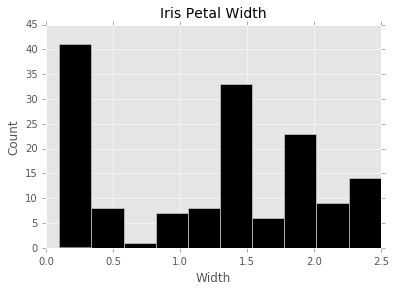

In [22]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df['petal width'], color='black')
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Width', fontsize=12)
plt.title('Iris Petal Width', fontsize=14, y=1.01)

We can draw histograms of four columns of the dataset in on figure:

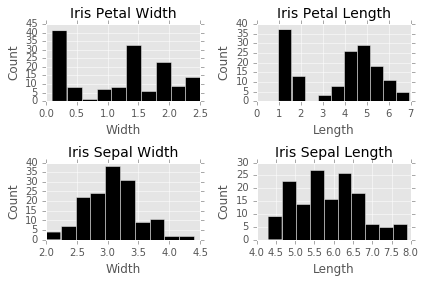

In [26]:
fig, ax = plt.subplots(2,2,figsize=(6,4))

ax[0][0].hist(df['petal width'], color='black')
ax[0][0].set_ylabel('Count', fontsize=12)
ax[0][0].set_xlabel('Width', fontsize=12)
ax[0][0].set_title('Iris Petal Width', fontsize=14, y=1.01)

ax[0][1].hist(df['petal length'], color='black')
ax[0][1].set_ylabel('Count', fontsize=12)
ax[0][1].set_xlabel('Length', fontsize=12)
ax[0][1].set_title('Iris Petal Length', fontsize=14, y=1.01)

ax[1][0].hist(df['sepal width'], color='black')
ax[1][0].set_ylabel('Count', fontsize=12)
ax[1][0].set_xlabel('Width', fontsize=12)
ax[1][0].set_title('Iris Sepal Width', fontsize=14, y=1.01)

ax[1][1].hist(df['sepal length'], color='black')
ax[1][1].set_ylabel('Count', fontsize=12)
ax[1][1].set_xlabel('Length', fontsize=12)
ax[1][1].set_title('Iris Sepal Length', fontsize=14, y=1.01)

plt.tight_layout()#this method will nicely adjust the subplots automatically to avoid crowding.

One useful plot is a scatterplot. We can generate a scatterplot easily with `matplotlib`:

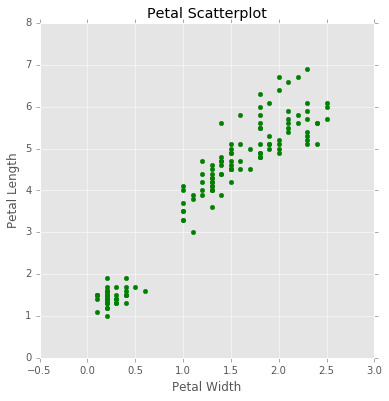

In [27]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(df['petal width'],df['petal length'], color='green')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Petal Length')
ax.set_title('Petal Scatterplot')

Another plot we could examine is a simple line plot. Here we look at a plot of the petal length:

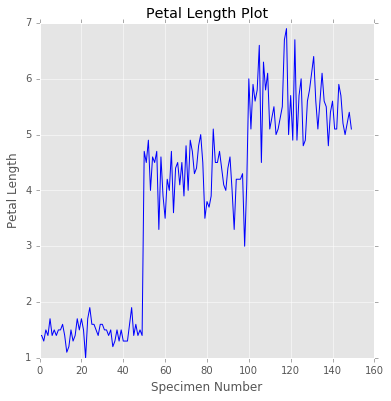

In [28]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(df['petal length'], color='blue')
ax.set_xlabel('Specimen Number')
ax.set_ylabel('Petal Length')
ax.set_title('Petal Length Plot')

And here is the bar chart:

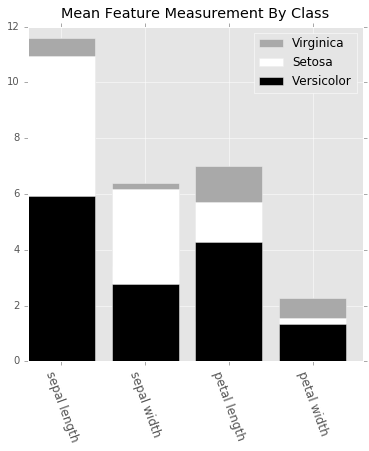

In [29]:
fig, ax = plt.subplots(figsize=(6,6))
bar_width = .8
labels = [x for x in df.columns if 'length' in x or 'width' in x]
ver_y = [df[df['class']=='Iris-versicolor'][x].mean() for x in
labels]
vir_y = [df[df['class']=='Iris-virginica'][x].mean() for x in
labels]
set_y = [df[df['class']=='Iris-setosa'][x].mean() for x in labels]
x = np.arange(len(labels))
ax.bar(x, vir_y, bar_width, bottom=set_y, color='darkgrey')

ax.bar(x, set_y, bar_width, bottom=ver_y, color='white')
ax.bar(x, ver_y, bar_width, color='black')
ax.set_xticks(x + (bar_width/2))
ax.set_xticklabels(labels, rotation=-70, fontsize=12);
ax.set_title('Mean Feature Measurement By Class', y=1.01)
ax.legend(['Virginica','Setosa','Versicolor'])

##### b. The seaborn library

This is a library that was created specifically for statistical visualizations. In fact, it is perfect for use with pandas DataFrames where the columns are features and rows are observations.

In [30]:
import seaborn as sns

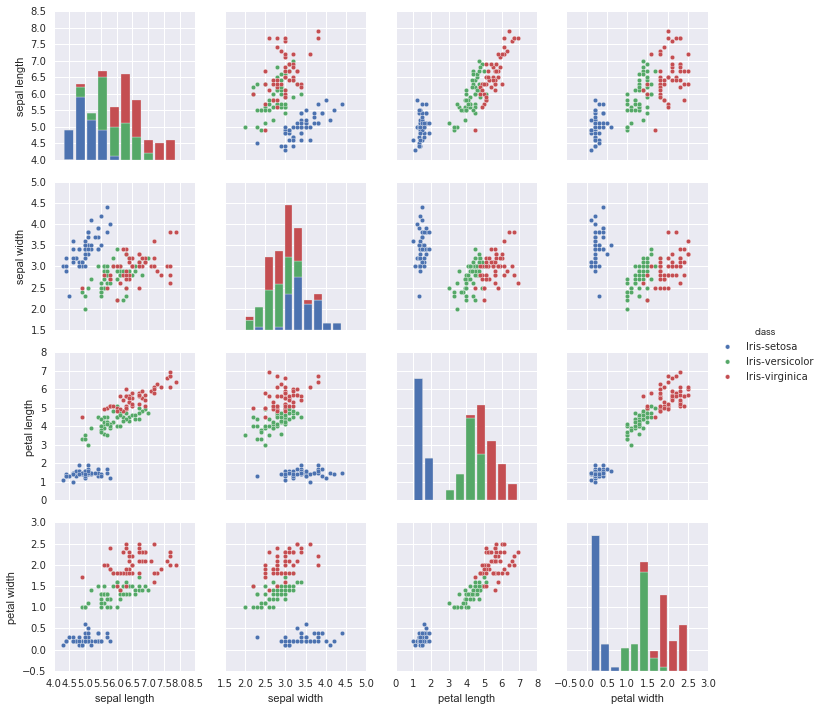

In [31]:
sns.pairplot(df, hue="class")

Create violinplot:

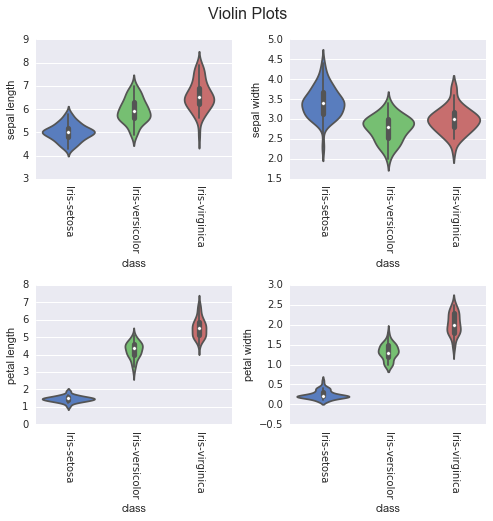

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
sns.set(style='white', palette='muted')
sns.violinplot(x=df['class'], y=df['sepal length'], ax=ax[0,0])
sns.violinplot(x=df['class'], y=df['sepal width'], ax=ax[0,1])
sns.violinplot(x=df['class'], y=df['petal length'], ax=ax[1,0])
sns.violinplot(x=df['class'], y=df['petal width'], ax=ax[1,1])
fig.suptitle('Violin Plots', fontsize=16, y=1.03)
for i in ax.flat:
    plt.setp(i.get_xticklabels(), rotation=-90)
fig.tight_layout()

#### Preparation

Data preparation and feature engineering are extremely important in machine learning. There are many useful methods in Python which help us to do this job.

##### Map
We can use map to tranform a column in a series:

In [36]:
df['class'] = df['class'].map({'Iris-setosa': 'SET', 'Iris-virginica':'VIR', 'Iris-versicolor': 'VER'})
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,SET
1,4.9,3.0,1.4,0.2,SET
2,4.7,3.2,1.3,0.2,SET
3,4.6,3.1,1.5,0.2,SET
4,5.0,3.6,1.4,0.2,SET


##### Apply
The apply method allows us to work with both DataFrames and Series.

In [37]:
df['wide petal'] = df['petal width'].apply(lambda v: 1 if v >= 1.3 else 0)
df.head()

,sepal length,sepal width,petal length,petal width,class,wide petal
0,5.1,3.5,1.4,0.2,SET,0
1,4.9,3.0,1.4,0.2,SET,0
2,4.7,3.2,1.3,0.2,SET,0
3,4.6,3.1,1.5,0.2,SET,0
4,5.0,3.6,1.4,0.2,SET,0


In [38]:
# we passed in axis=1 in order to tell pandas that we want to apply the function row-wise. If we passed in axis=0, then the function would operate column-wise.
df['petal area'] = df.apply(lambda r: r['petal length'] * r['petal width'], axis=1)
df.head()

,sepal length,sepal width,petal length,petal width,class,wide petal,petal area
0,5.1,3.5,1.4,0.2,SET,0,0.28
1,4.9,3.0,1.4,0.2,SET,0,0.28
2,4.7,3.2,1.3,0.2,SET,0,0.26
3,4.6,3.1,1.5,0.2,SET,0,0.30
4,5.0,3.6,1.4,0.2,SET,0,0.28


##### Applymap
We've looked at manipulating columns and explained how to work with rows, but suppose that you'd like to perform a function across all data cells in your DataFrame; this is where `applymap` is the right tool. Let's take a look at an example:

In [40]:
df.applymap(lambda v: np.log(v) if isinstance(v, float) else v)

,sepal length,sepal width,petal length,petal width,class,wide petal,petal area
0,1.629241,1.252763,0.336472,-1.609438,SET,0,-1.272966
1,1.589235,1.098612,0.336472,-1.609438,SET,0,-1.272966
2,1.547563,1.163151,0.262364,-1.609438,SET,0,-1.347074
3,1.526056,1.131402,0.405465,-1.609438,SET,0,-1.203973
4,1.609438,1.280934,0.336472,-1.609438,SET,0,-1.272966
5,1.686399,1.360977,0.530628,-0.916291,SET,0,-0.385662
6,1.526056,1.223775,0.336472,-1.203973,SET,0,-0.867501
7,1.609438,1.223775,0.405465,-1.609438,SET,0,-1.203973
8,1.481605,1.064711,0.336472,-1.609438,SET,0,-1.272966
9,1.589235,1.131402,0.405465,-2.302585,SET,0,-1.897120


##### Groupby

In [41]:
df.groupby('class').mean()

,sepal length,sepal width,petal length,petal width,wide petal,petal area
class,,,,,,
SET,5.006,3.418,1.464,0.244,0.0,0.3628
VER,5.936,2.770,4.260,1.326,0.7,5.7204
VIR,6.588,2.974,5.552,2.026,1.0,11.2962


In [42]:
df.groupby('class').describe()

petal area  petal length  petal width  sepal length  sepal width  \
class                                                                           
SET   count   50.000000     50.000000    50.000000     50.000000    50.000000   
      mean     0.362800      1.464000     0.244000      5.006000     3.418000   
      std      0.183248      0.173511     0.107210      0.352490     0.381024   
      min      0.110000      1.000000     0.100000      4.300000     2.300000   
      25%      0.265000      1.400000     0.200000      4.800000     3.125000   
      50%      0.300000      1.500000     0.200000      5.000000     3.400000   
      75%      0.420000      1.575000     0.300000      5.200000     3.675000   
      max      0.960000      1.900000     0.600000      5.800000     4.400000   
VER   count   50.000000     50.000000    50.000000     50.000000    50.000000   
      mean     5.720400      4.260000     1.326000      5.936000     2.770000   
      std      1.368403      0.469911     0.197753      0.516171     0.313798   
      min      3.300000      3.000000     1.000000      4.900000     2.000000   
      25%      4.860000      4.000000     1.200000      5.600000     2.525000   
      50%      5.615000      4.350000     1.300000      5.900000     2.800000   
      75%      6.750000      4.600000     1.500000      6.300000     3.000000   
      max      8.640000      5.100000     1.800000      7.000000     3.400000   
VIR   count   50.000000     50.000000    50.000000     50.000000    50.000000   
      mean    11.296200      5.552000     2.026000      6.588000     2.974000   
      std      2.157412      0.551895     0.274650      0.635880     0.322497   
      min      7.500000      4.500000     1.400000      4.900000     2.200000   
      25%      9.717500      5.100000     1.800000      6.225000     2.800000   
      50%     11.445000      5.550000     2.000000      6.500000     3.000000   
      75%     12.790000      5.875000     2.300000      6.900000     3.175000   
      max     15.870000      6.900000     2.500000      7.900000     3.800000   

             wide petal  
class                    
SET   count    50.00000  
      mean      0.00000  
      std       0.00000  
      min       0.00000  
      25%       0.00000  
      50%       0.00000  
      75%       0.00000  
      max       0.00000  
VER   count    50.00000  
      mean      0.70000  
      std       0.46291  
      min       0.00000  
      25%       0.00000  
      50%       1.00000  
      75%       1.00000  
      max       1.00000  
VIR   count    50.00000  
      mean      1.00000  
      std       0.00000  
      min       1.00000  
      25%       1.00000  
      50%       1.00000  
      75%       1.00000  
      max       1.00000

In [43]:
df.groupby('petal width')['class'].unique().to_frame()

,class
petal width,
0.1,[SET]
0.2,[SET]
0.3,[SET]
0.4,[SET]
0.5,[SET]
0.6,[SET]
1.0,[VER]
1.1,[VER]
1.2,[VER]


In [44]:
df.groupby('class')['petal width'].agg({'delta': lambda x: x.max() - x.min(), 'max': np.max, 'min': np.min})

,max,min,delta
class,,,
SET,0.6,0.1,0.5
VER,1.8,1.0,0.8
VIR,2.5,1.4,1.1


### Modeling and Evaluation

Python has an excellent selection of well-documented libraries for statistical modeling and machine learning.

#### Statsmodels

Statsmodels is a Python package that was developed to explore data, estimate models, and run statistical tests. Let's use it here to build a simple linear regression model of the relationship between the sepal length and sepal width for the `setosa` class.

First, let's visually inspect the relationship with a scatterplot:

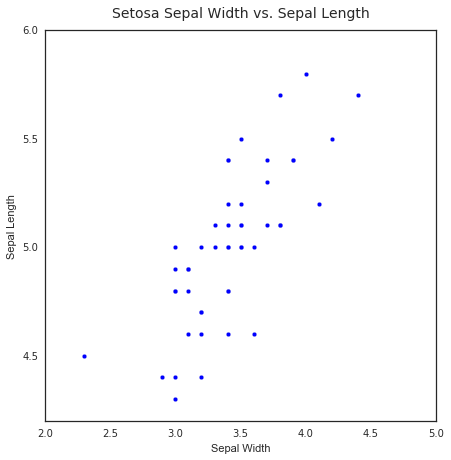

In [45]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df['sepal width'][:50], df['sepal length'][:50])
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14,
y=1.02)

We can see that there appears to be a positive linear relationship, that is, as the sepal width increases, sepal length does as well. We next run a linear regression model on the data using `statsmodels` to estimate the strength of this relationship:

In [46]:
import statsmodels.api as sm

In [48]:
y = df['sepal length'][:50]
x = df['sepal width'][:50]
X = sm.add_constant(x)

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal length   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Thu, 05 Jan 2017   Prob (F-statistic):           4.75e-10
Time:                        17:51:17   Log-Likelihood:                 2.0879
No. Observations:                  50   AIC:                           -0.1759
Df Residuals:                      48   BIC:                             3.648
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           2.6447      0.305      8.660      

The preceding screenshot shows the results of our simple regression model. As this is a linear regression, the model takes the format of Y = Β0+Β1X, where B0 is the intercept and B1 is the regression coefficient. Here, the formula would be `Sepal Length = 2.6447 + 0.6909 * Sepal Width`. We can also see that R2 for the model is a respectable 0.558, and the p-value (Prob) is highly significant—at least for this class.

Let's now use the results object to plot our regression line:

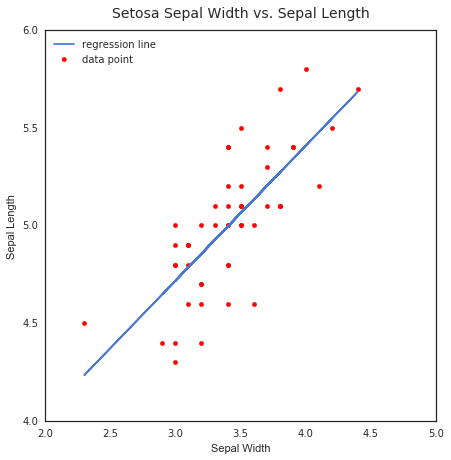

In [49]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x, results.fittedvalues, label='regression line')
ax.scatter(x, y, label='data point', color='r')
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.02)
ax.legend(loc=2)

This is an exceptionally useful package for standard statistical modeling in Python. Let's now move on to the king of Python machine learning packages, `scikit-learn`.

#### Scikit-learn
Scikit-learn is an amazing Python library with unrivaled documentation designed to provide a consistent API to dozens of algorithms. It is built on—and is itself—a core component of the Python scientific stack, namely, NumPy, SciPy, pandas, and matplotlib. Here are some of the areas that scikit-learn covers: classification, regression, clustering,
dimensionality reduction, model selection, and preprocessing.

We'll look at a few examples. First, we will build a classifier using our iris data, and then we'll look at how we can evaluate our model using the tools of scikit-learn.

The first step to building a machine learning model in scikit-learn is understanding how the data must be structured. The independent variables should be a numeric n x m matrix, X; a dependent variable, y; and an n x 1 vector. The y vector may be either numeric continuous or categorical or string categorical. These are then passed into the .fit() method on the chosen classifier. This is the great benefit of using scikit-learn; each classifier utilizes the
same methods to the extent that's possible. This makes swapping them in and out a breeze.

Let's see this in action in our first example:

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

In [53]:
clf = RandomForestClassifier(max_depth=5, n_estimators=10)

X = df.ix[:,:4]
y = df.ix[:,4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted', 'actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)
rf

,predicted,actual,correct
0,SET,SET,1
1,VIR,VER,0
2,VER,VER,1
3,VIR,VER,0
4,VIR,VIR,1
5,VIR,VIR,1
6,SET,SET,1
7,VER,VER,1
8,VER,VER,1
9,VIR,VIR,1


In [54]:
rf['correct'].sum()/rf['correct'].count()

0.9555555555555556

Let's now see which features gave us the most discriminative or predictive power:

([<matplotlib.axis.XTick at 0x11b629438>,
 <a list of 4 Text xticklabel objects>)

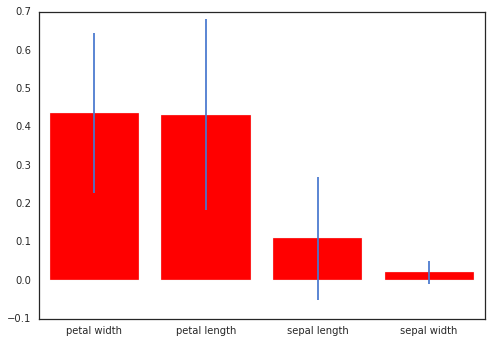

In [55]:
f_importances = clf.feature_importances_
f_names = df.columns[:4]
f_std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

imps = [x[0] for x in zzs]
labels = [x[1] for x in zzs]
errs = [x[2] for x in zzs]

plt.bar(range(len(f_importances)), imps, color='r', yerr=errs, align='center')
plt.xticks(range(len(f_importances)), labels)

Let's now take a look at one more example using scikit-learn. We will now switch our classifier and use a support vector machine (SVM):

In [56]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split

In [57]:
clf = OneVsRestClassifier(SVC(kernel='linear'))

X = df.ix[:,:4]
y = np.array(df.ix[:,4]).astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted', 'actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)
rf

,predicted,actual,correct
0,VIR,VIR,1
1,SET,SET,1
2,VIR,VIR,1
3,SET,SET,1
4,VER,VER,1
5,VER,VER,1
6,VER,VER,1
7,VER,VER,1
8,VER,VER,1
9,SET,SET,1


In [58]:
rf['correct'].sum()/rf['correct'].count()

0.93333333333333335